# Build a deep learning model

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers                       ## conflict with -> from keras import layers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

#from keras.models import Sequential                      ## redundant
# from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

## Loading data

In [10]:
df_ham = pd.read_csv("SPAM text message 20170820 - Data.csv")
df_ham.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df_ham.shape

(5572, 2)

## Exploratory analysis

#### Discovery 
SPAMs do have patterns like: obvious words (free, winner, urgent etc.), upper-case letters and combination of these with exclamation mark, letter X, misspellings, several digits etc.

In [35]:
df_ham[:25] 

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


## Create dummy variable

In [11]:
## replace Category 

dict_trans = {'ham' : 0, 'spam': 1}
df_ham = df_ham.replace({"Category": dict_trans})

df_ham.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## TfIdf-Vectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)               ## 
df_tfidf = vectorizer.fit_transform(df_ham["Message"])   ## .astype('float16')
  

print("training set: ", df_tfidf.shape)
print(type(df_tfidf))

training set:  (5572, 8709)
<class 'scipy.sparse.csr.csr_matrix'>


## Split data

In [13]:
tX_train, tX_test, ty_train, ty_test = train_test_split(df_tfidf, 
                                                    df_ham["Category"], 
                                                    test_size=0.3, 
                                                    random_state=42)

## Build model 1: base model

In [14]:
## matrix
#input_dim = tX_train_new.shape[1]     ## 1


model = keras.Sequential()
model.add(layers.Dense(64, input_shape=[tX_train.shape[1]], activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                557440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 557,505
Trainable params: 557,505
Non-trainable params: 0
_________________________________________________________________


### Model compilation

### (alternative option)

In [ ]:
from keras.optimizers import RMSprop

model.compile(loss=sLossMetric,
            optimizer=RMSprop(0.001),
            metrics=['accuracy'])

model.summary()

### compile

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                557440    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 557,505
Trainable params: 557,505
Non-trainable params: 0
_________________________________________________________________


### model.fit

In [16]:
history = model.fit(tX_train, ty_train,
                    epochs=100,                            ## 20
                    verbose=True,
                    validation_data=(tX_test, ty_test),    ## validation_data=(tX_test, ty_test) -> see ValueError, validation_split = 0.2
                    batch_size=10)


## ValueError: Error when checking input: expected dense_input to have 
## shape (7262,) but got array with shape (4421,)

Train on 3900 samples, validate on 1672 samples
Epoch 1/100
3900/3900 [==============================] - 2s 554us/sample - loss: 0.2631 - acc: 0.9156 - val_loss: 0.0874 - val_acc: 0.9821
Epoch 2/100
3900/3900 [==============================] - 2s 461us/sample - loss: 0.0505 - acc: 0.9867 - val_loss: 0.0524 - val_acc: 0.9880
Epoch 3/100
3900/3900 [==============================] - 2s 464us/sample - loss: 0.0195 - acc: 0.9956 - val_loss: 0.0458 - val_acc: 0.9886
Epoch 4/100
3900/3900 [==============================] - 2s 461us/sample - loss: 0.0093 - acc: 0.9990 - val_loss: 0.0439 - val_acc: 0.9892
Epoch 5/100
3900/3900 [==============================] - 2s 469us/sample - loss: 0.0053 - acc: 0.9990 - val_loss: 0.0438 - val_acc: 0.9904
Epoch 6/100
3900/3900 [==============================] - 2s 478us/sample - loss: 0.0032 - acc: 0.9997 - val_loss: 0.0460 - val_acc: 0.9910
Epoch 7/100
3900/3900 [==============================] - 2s 497us/sample - loss: 0.0020 - acc: 0.9997 - val_loss: 0.04

Epoch 58/100
3900/3900 [==============================] - 2s 502us/sample - loss: 5.8371e-07 - acc: 1.0000 - val_loss: 0.0964 - val_acc: 0.9892
Epoch 59/100
3900/3900 [==============================] - 2s 510us/sample - loss: 5.0758e-07 - acc: 1.0000 - val_loss: 0.0973 - val_acc: 0.9892
Epoch 60/100
3900/3900 [==============================] - 2s 503us/sample - loss: 4.4874e-07 - acc: 1.0000 - val_loss: 0.0974 - val_acc: 0.9892
Epoch 61/100
3900/3900 [==============================] - 2s 520us/sample - loss: 3.8338e-07 - acc: 1.0000 - val_loss: 0.1000 - val_acc: 0.9880
Epoch 62/100
3900/3900 [==============================] - 2s 513us/sample - loss: 3.3385e-07 - acc: 1.0000 - val_loss: 0.0988 - val_acc: 0.9892
Epoch 63/100
3900/3900 [==============================] - 2s 542us/sample - loss: 2.8532e-07 - acc: 1.0000 - val_loss: 0.1021 - val_acc: 0.9880
Epoch 64/100
3900/3900 [==============================] - 2s 535us/sample - loss: 2.4512e-07 - acc: 1.0000 - val_loss: 0.1024 - val_acc:

### Loss, Accuracy

In [17]:
loss, accuracy = model.evaluate(tX_train, ty_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [18]:
## tX_test.shape (1672, 4421), tX_train.shape (3900, 7262)

loss, accuracy = model.evaluate(tX_test, ty_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.9874


## Plot model performance

In [20]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


### Accuracy

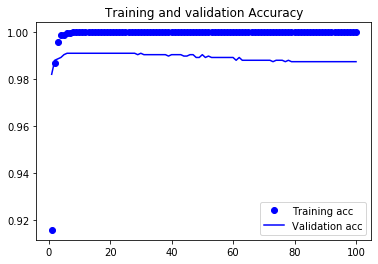

In [30]:
# Plot training performance
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(mse) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

### Interpretation:

Relatively high accuracy because of obvious structure of SPAM mails (text).
After **Epoche 7** accuracy of 1.00.

Problem of **Overfitting**.

VS.

If you see your machine learning algorithm predicting too well, always wonder: am I including any feature duplicating the targets in my input dataset?

### Loss

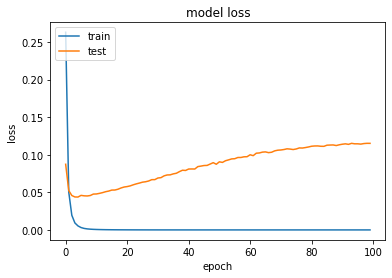

In [31]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Interpretation:

Loss increases after first few epochs.
Overfitting: Low Bias, high Variance...



(...)

# Build Model 2: Word Embedding instead of CountVectorizer

In [14]:
# data pre-processing
labels = df_ham['Category'].values
messages = df_ham['Message'].values
messages_train2, messages_test2, y_train2, y_test2 = train_test_split(messages, labels, test_size=0.3, random_state=42)

In [26]:
y_train2

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# Word Embeddings
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=5000, char_level=False)
tokenizer.fit_on_texts(messages_train2) # just on the training set...

X2_train = tokenizer.texts_to_sequences(messages_train2)
X2_test = tokenizer.texts_to_sequences(messages_test2)

vocab_size = len(tokenizer.word_index) + 1 # Adding 1

print(X2_train[1])
print(messages_train2[1])

[19, 4, 1021, 112, 93, 6, 40, 358]
on a Tuesday night r u 4 real


In [49]:
# pad sequences
maxlen = 100

X2_train = pad_sequences(X2_train, padding='post', maxlen=maxlen)
X2_test = pad_sequences(X2_test, padding='post', maxlen=maxlen)

In [52]:
# building the model2 with the Embedding Layer
embedding_dim = 50 # the smaller the better for the computational performance...

model2 = keras.Sequential()
model2.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model2.add(layers.Flatten()) #if after the embedding layer a Dense layer follows, the output has to be flattened
model2.add(layers.Dense(64, activation='relu')) #same layers and parameters as in model 1
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           375050    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                320064    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 695,179
Trainable params: 695,179
Non-trainable params: 0
_________________________________________________________________


In [73]:
# fitting model2
history2 = model2.fit(X2_train, y_train2,
                    epochs=100,
                    verbose=True,
                    validation_data=(X2_test, y_test2),
                    batch_size=10)


Train on 3900 samples, validate on 1672 samples
Epoch 1/100
3900/3900 [==============================] - 2s 526us/sample - loss: 7.3491e-08 - acc: 1.0000 - val_loss: 0.1021 - val_acc: 0.9898
Epoch 2/100
3900/3900 [==============================] - 2s 538us/sample - loss: 5.6616e-08 - acc: 1.0000 - val_loss: 0.1045 - val_acc: 0.9886
Epoch 3/100
3900/3900 [==============================] - 2s 554us/sample - loss: 4.6466e-08 - acc: 1.0000 - val_loss: 0.1051 - val_acc: 0.9898
Epoch 4/100
3900/3900 [==============================] - 2s 554us/sample - loss: 3.8942e-08 - acc: 1.0000 - val_loss: 0.1062 - val_acc: 0.9898
Epoch 5/100
3900/3900 [==============================] - 2s 572us/sample - loss: 3.1920e-08 - acc: 1.0000 - val_loss: 0.1072 - val_acc: 0.9898
Epoch 6/100
3900/3900 [==============================] - 2s 577us/sample - loss: 2.6289e-08 - acc: 1.0000 - val_loss: 0.1101 - val_acc: 0.9886
Epoch 7/100
3900/3900 [==============================] - 2s 584us/sample - loss: 2.2632e-08 - 

3900/3900 [==============================] - 3s 669us/sample - loss: 7.0307e-10 - acc: 1.0000 - val_loss: 0.1523 - val_acc: 0.9880
Epoch 58/100
3900/3900 [==============================] - 3s 676us/sample - loss: 7.2813e-10 - acc: 1.0000 - val_loss: 0.1530 - val_acc: 0.9880
Epoch 59/100
3900/3900 [==============================] - 3s 696us/sample - loss: 7.4869e-10 - acc: 1.0000 - val_loss: 0.1536 - val_acc: 0.9880
Epoch 60/100
3900/3900 [==============================] - 3s 749us/sample - loss: 6.8978e-10 - acc: 1.0000 - val_loss: 0.1532 - val_acc: 0.9880
Epoch 61/100
3900/3900 [==============================] - 3s 664us/sample - loss: 6.7118e-10 - acc: 1.0000 - val_loss: 0.1533 - val_acc: 0.9880
Epoch 62/100
3900/3900 [==============================] - 2s 633us/sample - loss: 7.0320e-10 - acc: 1.0000 - val_loss: 0.1539 - val_acc: 0.9880
Epoch 63/100
3900/3900 [==============================] - 3s 649us/sample - loss: 7.0986e-10 - acc: 1.0000 - val_loss: 0.1541 - val_acc: 0.9880
Epoch

In [74]:
loss, accuracy = model2.evaluate(X2_train, y_train2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X2_test, y_test2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.9880


In [75]:
print(history2.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


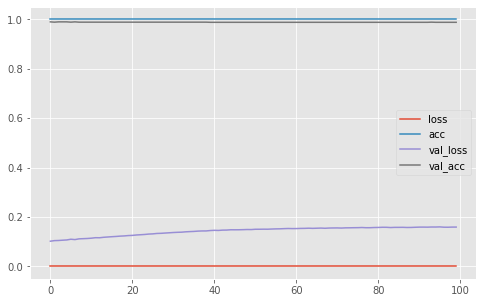

In [77]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.show()

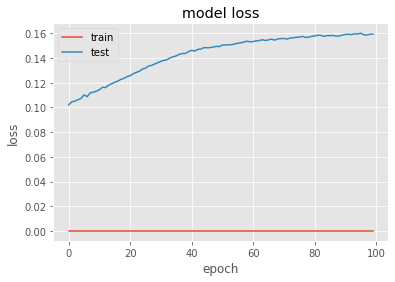

In [78]:
# loss vs. epoch plot
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Interpretation
Accuracy is a bit higher than with the base model. However, there is no loss at training which rises the question how the model can learn. It seems as if there is a serious overfitting in the model.

In [1]:
# Make predictions
tX_test = scaler 

test_predictions = model.predict(tX_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

NameError: name 'scaler' is not defined